### **Imports and Loading**

In [1]:
# Import packages for data manipulation
import pandas as pd
import numpy as np
# Import packages for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.utils import resample
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [2]:
# Load dataset into dataframe
tiktok_data = pd.read_csv('tiktok_dataset.csv')

In [3]:
# Display first few rows
tiktok_data.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [4]:
# Get number of rows and columns
tiktok_data.shape

(19382, 12)

In [5]:
#Get the data types of each column
tiktok_data.dtypes

#                             int64
claim_status                 object
video_id                      int64
video_duration_sec            int64
video_transcription_text     object
verified_status              object
author_ban_status            object
video_view_count            float64
video_like_count            float64
video_share_count           float64
video_download_count        float64
video_comment_count         float64
dtype: object

In [6]:
#Get basic information
tiktok_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


In [7]:
#Generate basic descriptive stats
tiktok_data.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19382.000000,1.938200e+04,19382.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9691.500000,5.627454e+09,32.421732,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5595.245794,2.536440e+09,16.229967,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4846.250000,3.430417e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9691.500000,5.618664e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14536.750000,7.843960e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19382.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000


In [8]:
#Check for missing Data
tiktok_data.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

In [9]:
#Drop rows with missing data
tiktok_data.dropna(axis = 0, inplace= True)

In [10]:
tiktok_data.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


In [11]:
#Check for any duplicate records
tiktok_data.duplicated().sum()

0

### **Check for and handle any outliers**

Create box plots for video duration, like count, share count, and comment count

In [12]:
sns.set(font_scale = 1.3)

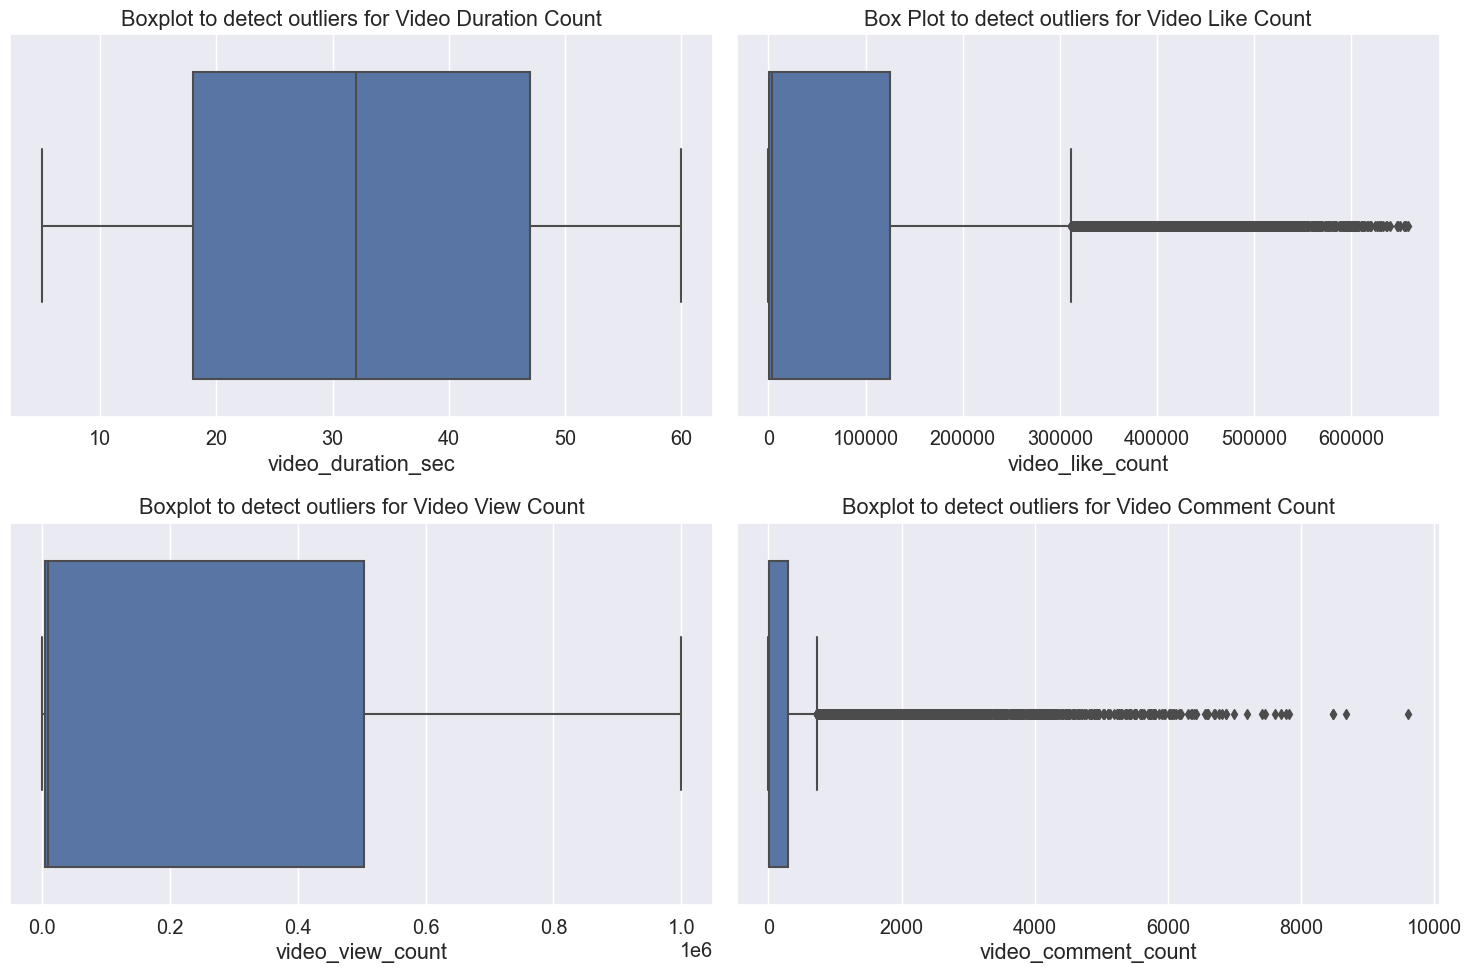

In [13]:
fig, axis = plt.subplots(2,2, figsize = (15,10))
#Video Duration
sns.boxplot(x = tiktok_data['video_duration_sec'], ax= axis[0,0])
axis[0,0].set_title('Boxplot to detect outliers for Video Duration Count')

#Video Like Count
sns.boxplot(x = tiktok_data['video_like_count'], ax = axis[0,1])
axis[0,1].set_title('Box Plot to detect outliers for Video Like Count')
#Video View Count
sns.boxplot(x = tiktok_data['video_view_count'], ax = axis[1,0])
axis[1,0].set_title('Boxplot to detect outliers for Video View Count')
#Video Comment Count
sns.boxplot(x = tiktok_data['video_comment_count'], ax = axis[1,1])
axis[1,1].set_title('Boxplot to detect outliers for Video Comment Count')


fig.tight_layout();

In [14]:
#Check for and handle outliers for video like count
percentile25 = tiktok_data['video_like_count'].quantile(.25)
percentile75 = tiktok_data['video_like_count'].quantile(.75)

iqr = percentile75 - percentile25

upperlimit = percentile75 + 1.5*iqr

tiktok_data.loc[tiktok_data['video_like_count']>upperlimit, 'video_like_count'] = upperlimit

In [15]:
#Check for and handle outliers for video comment count
percentile25 = tiktok_data['video_comment_count'].quantile(.25)
percentile75 = tiktok_data['video_comment_count'].quantile(.75)

iqr = percentile75 - percentile25

upperlimit = percentile75 + 1.5*iqr

tiktok_data.loc[tiktok_data['video_comment_count']>upperlimit, 'video_comment_count'] = upperlimit

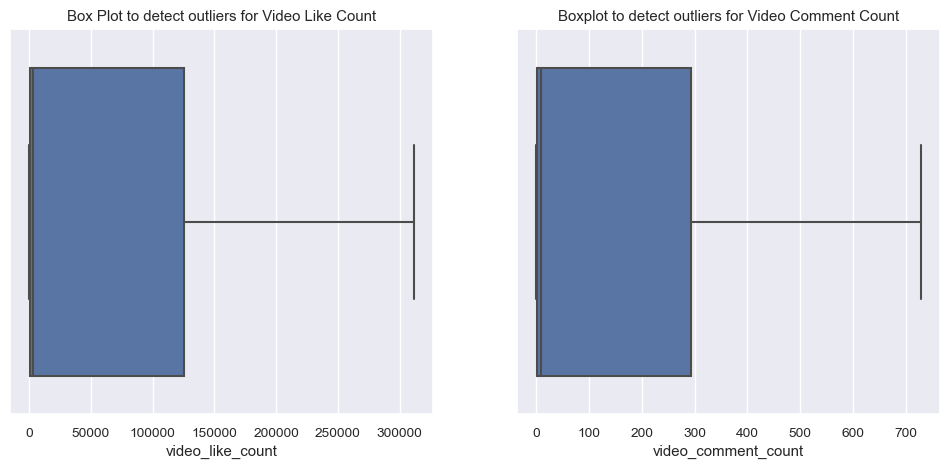

In [16]:
sns.set(font_scale = .9)
#Updated Box plots for video like and comment count
fig, axis = plt.subplots(1,2, figsize = (12,5))
#Video Like Count
sns.boxplot(x = tiktok_data['video_like_count'], ax = axis[0])
axis[0].set_title('Box Plot to detect outliers for Video Like Count')
#Video Comment Count
sns.boxplot(x = tiktok_data['video_comment_count'], ax = axis[1])
axis[1].set_title('Boxplot to detect outliers for Video Comment Count');

In [17]:
tiktok_data['verified_status'].value_counts()

verified_status
not verified    17884
verified         1200
Name: count, dtype: int64

In [18]:
#Check Verified Status relative frequencies
tiktok_data['verified_status'].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 94% of the dataset represents videos posted by unverified accounts and 6% represents videos posted by verified accounts. So the outcome variable is not very balanced.

Use resampling to create class balance in the outcome variable

In [19]:
# Identify data points from majority and minority classes
tiktok_status_minority = tiktok_data[tiktok_data['verified_status'] == 'verified']
tiktok_status_majority = tiktok_data[tiktok_data['verified_status'] == 'not verified']

# Upsample the minority class

tiktok_status_minority_upsample = resample(tiktok_status_minority,random_state= 11, #random state for reproducible results
                                    n_samples=len(tiktok_status_majority),
                                    
                                    replace = True #sample with replacement,
                                    )
tiktok_data_upsampled = pd.concat([tiktok_status_majority, tiktok_status_minority_upsample]).reset_index(drop = True)

In [20]:
tiktok_data_upsampled['verified_status'].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [21]:
# Get the average `video_transcription_text` length for claims and the average `video_transcription_text` length for opinions

tiktok_data_upsampled[['claim_status', 'video_transcription_text']].groupby('claim_status')[['video_transcription_text']].agg(lambda array: np.mean([len(text) for text in array]))

,video_transcription_text
claim_status,
claim,95.202297
opinion,82.556442


In [22]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
tiktok_data_upsampled['transcript_length'] = tiktok_data_upsampled['video_transcription_text'].apply(lambda x: len(x))

In [23]:
tiktok_data_upsampled.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_length
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,97
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,107
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,137


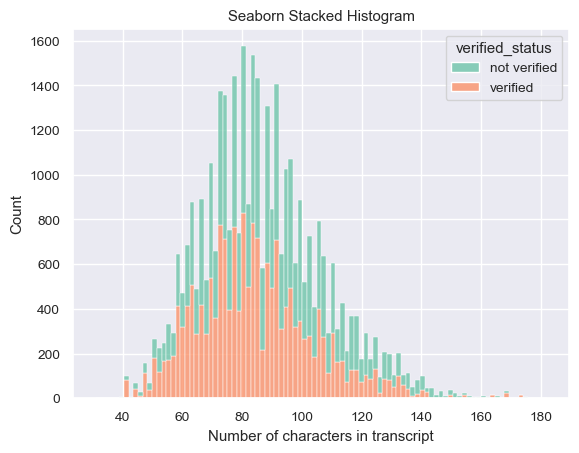

In [24]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data = tiktok_data_upsampled, x = 'transcript_length', hue = 'verified_status', multiple="stack", legend=True, palette='Set2')

plt.title("Seaborn Stacked Histogram")
plt.xlabel('Number of characters in transcript');

In [25]:
# Code a correlation matrix to help determine most correlated variables
tiktok_data_upsampled.corr(numeric_only=True)

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,transcript_length
#,1.000000,0.001634,-0.011622,-0.698126,-0.627107,-0.505700,-0.484791,-0.605557,-0.195279
video_id,0.001634,1.000000,0.010441,-0.000709,0.003074,0.007604,0.005742,0.007028,-0.000939
video_duration_sec,-0.011622,0.010441,1.000000,0.012570,0.002913,0.000143,0.003586,-0.001539,-0.014151
video_view_count,-0.698126,-0.000709,0.012570,1.000000,0.854560,0.708803,0.687580,0.744643,0.244398
video_like_count,-0.627107,0.003074,0.002913,0.854560,1.000000,0.833461,0.803408,0.816041,0.216679
video_share_count,-0.505700,0.007604,0.000143,0.708803,0.833461,1.000000,0.708432,0.670110,0.172769
video_download_count,-0.484791,0.005742,0.003586,0.687580,0.803408,0.708432,1.000000,0.793579,0.171431
video_comment_count,-0.605557,0.007028,-0.001539,0.744643,0.816041,0.670110,0.793579,1.000000,0.214879
transcript_length,-0.195279,-0.000939,-0.014151,0.244398,0.216679,0.172769,0.171431,0.214879,1.000000


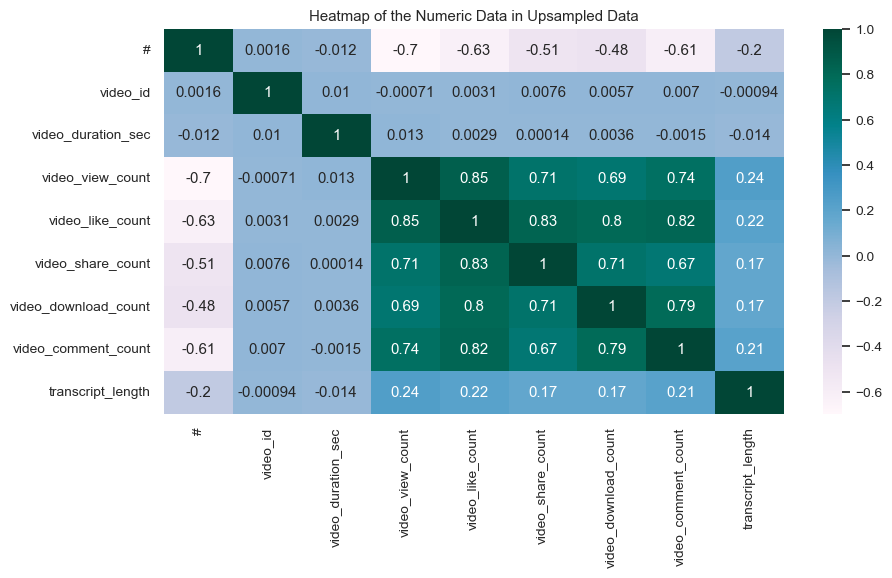

In [26]:
plt.figure(figsize = (10,5))

sns.heatmap(tiktok_data_upsampled.corr(numeric_only=True), annot=True, cmap='PuBuGn')

plt.title("Heatmap of the Numeric Data in Upsampled Data");

In [27]:
# Select outcome variable

y = tiktok_data_upsampled['verified_status']

In [28]:
# Select features
x = tiktok_data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

In [29]:
x.head(3)

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0


**Note:** The `#` and `video_id` columns are not selected as features here, because they do not seem to be helpful for predicting whether a video presents a claim or an opinion. Also, `video_like_count` is not selected as a feature here, because it is strongly correlated with other features, as discussed earlier. And logistic regression has a no multicollinearity model assumption that needs to be met.

### **Train-test split**

In [30]:
# Split the data into training and testing sets
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3, random_state=11)

In [31]:
#Confirm that each set holds the same amount of records
x_train.shape,y_train.shape, x_test.shape, y_test.shape

((25037, 7), (25037,), (10731, 7), (10731,))

In [32]:
# Check data types
x_train.dtypes

video_duration_sec        int64
claim_status             object
author_ban_status        object
video_view_count        float64
video_share_count       float64
video_download_count    float64
video_comment_count     float64
dtype: object

In [33]:
# Get unique values in `claim_status`
x_train['claim_status'].unique()

array(['claim', 'opinion'], dtype=object)

In [34]:
# Get unique values in `author_ban_status`
x_train['author_ban_status'].unique()

array(['under review', 'active', 'banned'], dtype=object)

In [35]:
# Select the training features that needs to be encoded
x_train_to_encode = x_train[['claim_status', 'author_ban_status']]

x_train_to_encode.head(3)

,claim_status,author_ban_status
7672,claim,under review
20209,opinion,active
22914,opinion,active


In [36]:
# Set up an encoder for one-hot encoding the categorical features
x_encoder = OneHotEncoder(drop='first', sparse_output=False)
x_encoder

OneHotEncoder(drop='first', sparse_output=False)

In [37]:
# Fit and transform the training features using the encoder
x_train_encoded = x_encoder.fit_transform(x_train_to_encode)

In [38]:
# Get feature names from encoder
x_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [39]:
x_train_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [0., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.]])

In [40]:
# Place encoded training features (which is currently an array) into a dataframe
x_train_encoded_df = pd.DataFrame(data = x_train_encoded, columns = x_encoder.get_feature_names_out())

In [41]:
x_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,0.0,0.0,0.0
4,0.0,1.0,0.0


In [42]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
x_train.drop(columns=['claim_status', 'author_ban_status' ]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
7672,22,454050.0,9795.0,3111.0,728.5
20209,24,6112.0,534.0,12.0,3.0
22914,18,3335.0,35.0,16.0,1.0
21147,52,993601.0,123543.0,2648.0,728.5
1857,46,411824.0,19852.0,2027.0,698.0


In [43]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
x_final_train = pd.concat([x_train.drop(columns = ['claim_status', 'author_ban_status']).reset_index(drop=True), x_train_encoded_df], axis = 1)

In [44]:
x_final_train.head(3)

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,22,454050.0,9795.0,3111.0,728.5,0.0,0.0,1.0
1,24,6112.0,534.0,12.0,3.0,1.0,0.0,0.0
2,18,3335.0,35.0,16.0,1.0,1.0,0.0,0.0


In [45]:
# Check data type of outcome variable
y_train.dtype

dtype('O')

In [46]:
# Get unique values of outcome variable
y_train.unique()

array(['not verified', 'verified'], dtype=object)

In [48]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop = 'first', sparse_output=False)

In [56]:
# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_final_train = y_encoder.fit_transform(y_train.values.reshape(-1,1)).ravel()

In [57]:
y_final_train

array([0., 1., 1., ..., 0., 1., 0.])

### **Model Building**

In [59]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=2, max_iter=800).fit(x_final_train, y_final_train)

### **Results and Evaluation**

Encode categorical features in the testing set using an appropriate method.

In [63]:
# Select the testing features that needs to be encoded
x_test_to_encode = x_test[['claim_status', 'author_ban_status']]

x_test_to_encode.head()

,claim_status,author_ban_status
22512,opinion,active
11607,opinion,active
14466,opinion,active
19913,opinion,active
10544,opinion,active


In [65]:
# Transform the testing features using the encoder
x_test_encoded = x_encoder.transform(x_test_to_encode)

x_test_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

In [67]:
# Place encoded testing features into a dataframe
x_test_encoded_df = pd.DataFrame(data = x_test_encoded, columns = x_encoder.get_feature_names_out())

x_test_encoded_df.head(3)

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0


In [68]:
# Display first few rows of `X_test` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
x_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
22512,22,3271.0,111.0,5.0,2.0
11607,54,2044.0,68.0,19.0,2.0
14466,10,9084.0,175.0,3.0,0.0
19913,58,3322.0,85.0,7.0,1.0
10544,47,6815.0,266.0,6.0,2.0


In [70]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)

x_test_final = pd.concat([x_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), x_test_encoded_df], axis=1)

# Display first few rows
x_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,22,3271.0,111.0,5.0,2.0,1.0,0.0,0.0
1,54,2044.0,68.0,19.0,2.0,1.0,0.0,0.0
2,10,9084.0,175.0,3.0,0.0,1.0,0.0,0.0
3,58,3322.0,85.0,7.0,1.0,1.0,0.0,0.0
4,47,6815.0,266.0,6.0,2.0,1.0,0.0,0.0


In [71]:
# Use the logistic regression model to get predictions on the encoded testing set

y_pred = log_clf.predict(x_test_final)

In [72]:
# Display the predictions on the encoded testing set
y_pred

array([1., 1., 1., ..., 1., 0., 0.])

In [73]:
# Display the true labels of the testing set
y_test

22512        verified
11607    not verified
14466    not verified
19913        verified
10544    not verified
             ...     
13599    not verified
27235        verified
18085        verified
4151     not verified
3032     not verified
Name: verified_status, Length: 10731, dtype: object

Encode the true labels of the testing set so it can be compared to the predictions.


In [75]:
# Encode the testing outcome variable
y_test_final = y_encoder.transform(y_test.values.reshape(-1,1)).ravel()

y_test_final

array([1., 0., 0., ..., 1., 0., 0.])

In [77]:
# Get shape of each training and testing set
x_final_train.shape, y_train_final.shape, x_test_final.shape, y_test_final.shape

((25037, 8), (25037,), (10731, 8), (10731,))

**Note:** 

- The number of features (`8`) aligns between the training and testing sets.
- The number of rows aligns between the features and the outcome variable for training (`25037`) and testing (`10731`).

### **Visualize Model Results**

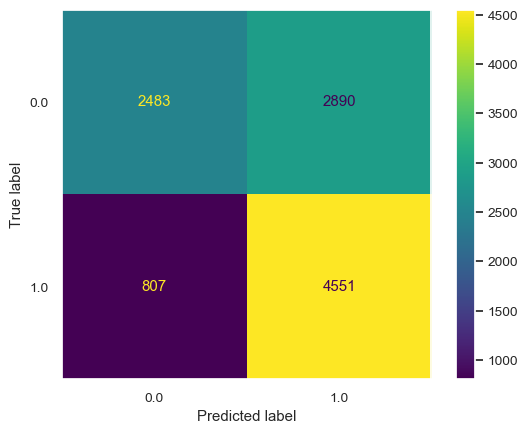

In [88]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels = log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.grid(False)
plt.show()

In [89]:
(4551+2483) / (4551 + 2483 + 807 + 2890)

0.6554841114528003

**Notes:**

The upper-left quadrant displays the number of true negatives: the number of videos posted by unverified accounts that the model accurately classified as so.

The upper-right quadrant displays the number of false positives: the number of videos posted by unverified accounts that the model misclassified as posted by verified accounts.

The lower-left quadrant displays the number of false negatives: the number of videos posted by verified accounts that the model misclassified as posted by unverified accounts.

The lower-right quadrant displays the number of true positives: the number of videos posted by verified accounts that the model accurately classified as so.

A perfect model would yield all true negatives and true positives, and no false negatives or false positives.

In [90]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.75      0.46      0.57      5373
not verified       0.61      0.85      0.71      5358

    accuracy                           0.66     10731
   macro avg       0.68      0.66      0.64     10731
weighted avg       0.68      0.66      0.64     10731



The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 85%, and it achieved an accuracy of 66%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

In [91]:
# Get the feature names from the model and the model coefficients (which represent log-odds ratios)
# Place into a DataFrame for readability
pd.DataFrame(data={"Feature Name":log_clf.feature_names_in_, "Model Coefficient":log_clf.coef_[0]})

,Feature Name,Model Coefficient
0,video_duration_sec,8.929285e-03
1,video_view_count,-2.159316e-06
2,video_share_count,5.856323e-06
3,video_download_count,8.056279e-06
4,video_comment_count,-7.643944e-04
5,claim_status_opinion,3.912105e-04
6,author_ban_status_banned,-1.801091e-05
7,author_ban_status_under review,-3.956468e-07


### **Conclusion**

- The dataset has a few strongly correlated variables, which might lead to multicollinearity issues when fitting a logistic regression model. We decided to drop `video_like_count` from the model building.
- Based on the logistic regression model, each additional second of the video is associated with 0.009 increase in the log-odds of the user having a verified status.
- The logistic regression model had not great, but acceptable predictive power: a precision of 61% is less than ideal, but a recall of 85% is very good. Overall accuracy is towards the lower end of what would typically be considered acceptable. 